In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
feature = []

with open('KDD/kddcup.names') as f:
    for line in f:
        feature.append(line.split(":")[0])

feature = feature[1:]
feature.append('target')

In [4]:
df = pd.read_csv('KDD/corrected/corrected', names=feature)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


<Axes: xlabel='target'>

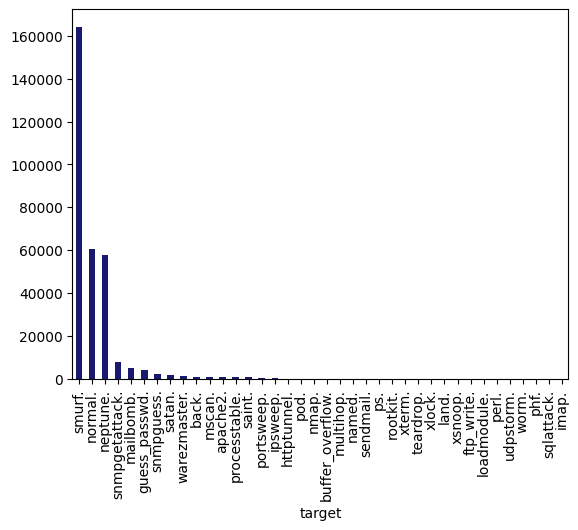

In [5]:
df.target.value_counts().plot(kind='bar', color='midnightblue')

<Axes: xlabel='service'>

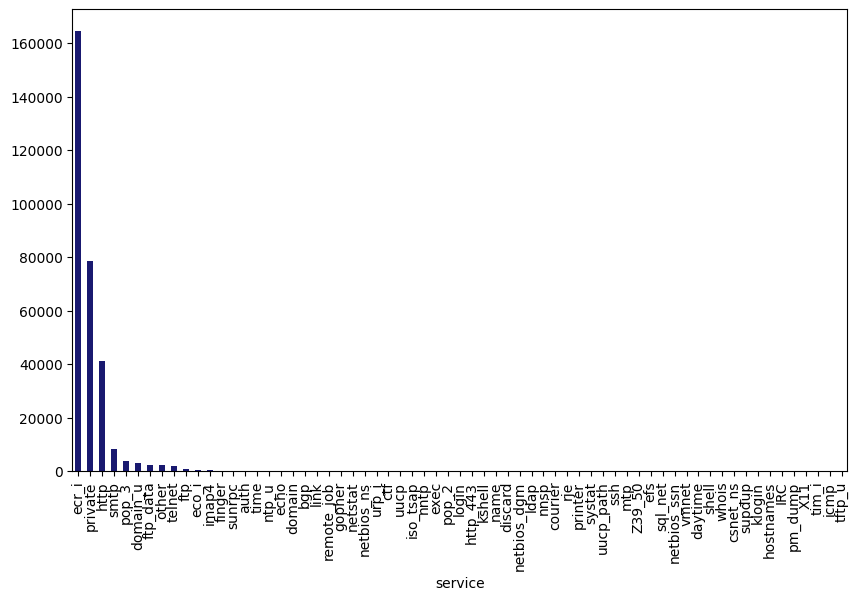

In [6]:
df.service.value_counts().plot(kind='bar', figsize=(10, 6),color="midnightblue")    

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [8]:
df.num_outbound_cmds

0         0
1         0
2         0
3         0
4         0
         ..
311024    0
311025    0
311026    0
311027    0
311028    0
Name: num_outbound_cmds, Length: 311029, dtype: int64

In [9]:
df.service.value_counts()

service
14    164352
46     78510
22     41237
50      8268
44      3972
       ...  
42        16
1         15
58         7
24         2
57         1
Name: count, Length: 65, dtype: int64

In [10]:
df.drop(["service","num_outbound_cmds"], axis=1, inplace=True)    

<Axes: >

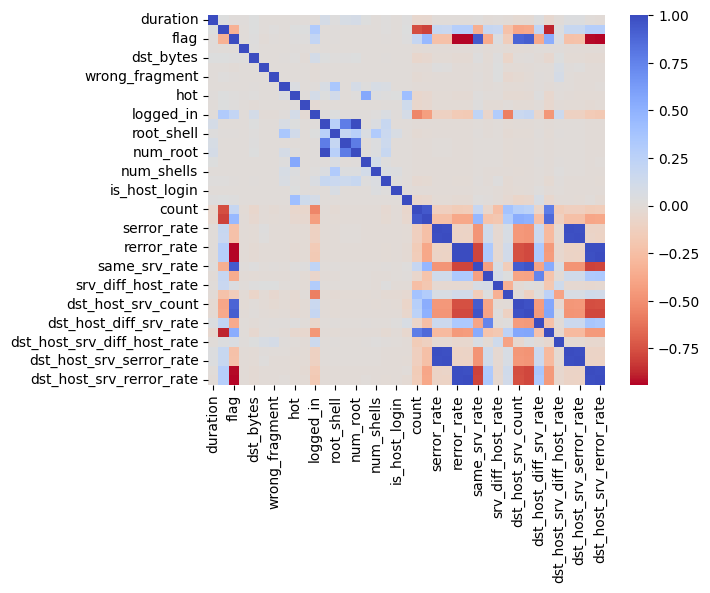

In [11]:
corr = df.iloc[:,:-1].corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [12]:
similars = []

for i in corr.columns:
    for j in corr.columns:
        if corr[i][j] > 0.9 and i != j and (j,i) not in similars:
            similars.append((i,j))

similars

[('flag', 'same_srv_rate'),
 ('flag', 'dst_host_same_srv_rate'),
 ('num_compromised', 'num_root'),
 ('count', 'srv_count'),
 ('serror_rate', 'srv_serror_rate'),
 ('serror_rate', 'dst_host_serror_rate'),
 ('serror_rate', 'dst_host_srv_serror_rate'),
 ('srv_serror_rate', 'dst_host_serror_rate'),
 ('srv_serror_rate', 'dst_host_srv_serror_rate'),
 ('rerror_rate', 'srv_rerror_rate'),
 ('rerror_rate', 'dst_host_rerror_rate'),
 ('rerror_rate', 'dst_host_srv_rerror_rate'),
 ('srv_rerror_rate', 'dst_host_rerror_rate'),
 ('srv_rerror_rate', 'dst_host_srv_rerror_rate'),
 ('same_srv_rate', 'dst_host_srv_count'),
 ('same_srv_rate', 'dst_host_same_srv_rate'),
 ('dst_host_srv_count', 'dst_host_same_srv_rate'),
 ('dst_host_serror_rate', 'dst_host_srv_serror_rate'),
 ('dst_host_rerror_rate', 'dst_host_srv_rerror_rate')]

In [13]:
# select 2nd column from similar list and drop it

delete = [i[1] for i in similars]
df = df.drop(delete, axis=1)
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target
0,0,2,9,105,146,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,255,0.01,0.00,0.0,normal.
1,0,2,9,105,146,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,255,0.01,0.00,0.0,normal.
2,0,2,9,105,146,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,255,0.01,0.00,0.0,normal.
3,0,2,9,105,146,0,0,0,0,0,...,2,0.0,0.0,0.0,0.0,255,0.01,0.00,0.0,snmpgetattack.
4,0,2,9,105,146,0,0,0,0,0,...,2,0.0,0.0,0.0,0.0,255,0.01,0.01,0.0,snmpgetattack.


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,max_leaf_nodes=100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=100, n_jobs=-1, random_state=42)

In [19]:
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred))

0.9736467007469805


Text(50.722222222222214, 0.5, 'True')

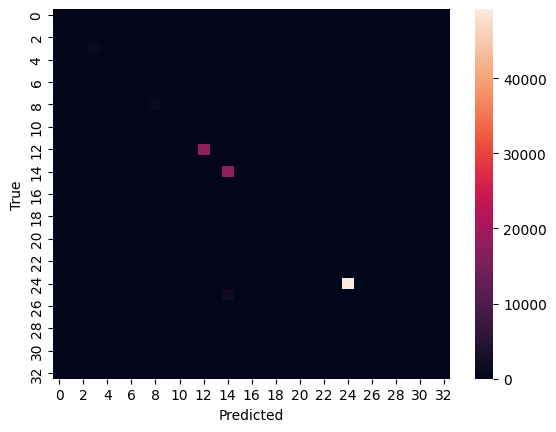

In [29]:
cnf = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf)
plt.xlabel('Predicted')
plt.ylabel('True')